In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino

## Session 09 - Unsupervised Learning - Clustering

<img src='../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
###------------------
### Import Statements
###------------------

import os
import numpy as np
import pandas as pd


import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import matplotlib.patheffects as PathEffects

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris, make_moons
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import pairwise_distances

from scipy.spatial import distance # To calculate distances
import scipy.cluster.hierarchy as sch


In [3]:
###----------------------
### Some Basic Parameters
###----------------------

# set location of input files:
inpDir = os.path.join('..', '..', 'input')

# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rnd = np.random.RandomState(RANDOM_STATE)

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.brg
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')


TEST_SIZE = 0.2

N_SAMPLES = 1000

NOISE = 0.1

<Figure size 1500x700 with 0 Axes>

## Helper Function

In [4]:
def plot_scatter(x, labels):
    '''
    Args:
        x: (dimentional data)
        labels : labels of the data
    Returns:
    '''
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    fig, ax = plt.subplots()
    
    #ax = plt.subplot(aspect='equal')
    ax.set_aspect('auto')
    
    # plot scatter plot on the axis
    sc = ax.scatter(x[:,0], x[:,1], s=15, 
                    c=palette[labels.astype(np.int16)], 
                    edgecolors = 'k')
    
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in np.unique(labels):

        # Position of each label at median of data points.
        xtext, ytext = np.median(x[labels == i, :], axis=0)

        # plot labels 'str(i)' at median point
        txt = ax.text(xtext, ytext, str(i), fontsize=20, color = palette[i])

        # mark with text effects
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="yellow"),
            PathEffects.Normal()])
        
        txts.append(txt)

    return

## Clustering

- Involves grouping similar data points together into clusters or groups.
- Find patterns or structures in the data.
- A form of unsupervised learning

**Grouping Similar Data:**  partition a dataset into groups or clusters in such a way that data points within the same cluster are more similar to each other than to those in other clusters. 
The similarity between data points is typically measured using a distance or similarity metric, such as Euclidean distance, cosine similarity, or others.

**No Prior Labels:**  works with unlabeled data. It's often used in situations where you don't have prior knowledge about the number of clusters or their characteristics.

### Common Clustering Methods
There are various clustering algorithms, each with its own approach. Some popular clustering methods include:
- **K-Means Clustering:** A partitioning method that aims to divide data into K clusters, where K is predefined. It iteratively assigns data points to the nearest cluster centroid and updates the centroids until convergence.
- **Hierarchical Clustering:** Creates a hierarchical structure of clusters, allowing you to explore data at different levels of granularity.
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** It defines clusters as dense regions separated by areas of lower point density. It's effective at finding irregularly shaped clusters.
- **Agglomerative Clustering:** A hierarchical clustering approach that starts with each data point as a single cluster and merges them step by step based on some linkage criteria.

### Applications: 
Clustering has a wide range of applications, including customer segmentation in marketing, image segmentation in computer vision, document categorization in natural language processing, and anomaly detection in various domains. It's also used for exploratory data analysis to better understand the structure of data.

### Evaluation:
Clustering results can be evaluated using various metrics, depending on the application and the specific clustering algorithm. Common evaluation metrics include silhouette score, Davies-Bouldin index, and purity.

### Challenges: 
Clustering can be challenging, as the quality of results depends on the choice of algorithm, distance metric, and the number of clusters (in the case of methods like K-Means). It can also be sensitive to outliers and the initial placement of cluster centroids in some algorithms.

## Silhouette Method
The silhouette method is a technique used in cluster analysis and unsupervised machine learning to evaluate the quality of clusters created by different clustering algorithms. It helps determine the optimal number of clusters for a given dataset. The silhouette method provides a quantitative measure of how well-separated the clusters are, allowing you to choose the number of clusters that maximizes cluster cohesion and separation.

For each data point in the dataset, calculate the following two metrics:
- **a(i):** The average distance between the data point and all other data points in the same cluster. This measures the cohesion within the cluster.
- **b(i):** The smallest average distance between the data point and all data points in any other cluster, excluding the cluster to which the data point belongs. This measures the separation from other clusters.

Calculate the silhouette score for each data point using the following formula:
$$s(i) = \frac{b(i) - a(i)}{max[a(i), b(i)]} $$

The silhouette score for a data point varies from -1 (poorly clustered) to +1 (well-clustered). A higher silhouette score indicates that the data point is closer to its own cluster compared to other clusters.

## Hierarchical clustering 

Hierarchical clustering is a popular method used in data analysis and machine learning to group similar data points into clusters or groups. 
* It builds a tree-like structure of clusters, where each node in the tree represents a cluster of data points, and the leaves of the tree represent individual data points.
* Hierarchical clustering can be visualized as a **dendrogram**, which is a *tree diagram* that shows the order in which clusters are merged and the distances at which they are merged.

There are two main approaches to hierarchical clustering:

### Agglomerative Hierarchical Clustering:
This is a **bottom-up approach**, where each data point initially forms its own cluster, and clusters are successively merged as the algorithm progresses.

The algorithm starts by considering each data point as a single cluster and then iteratively merges the two closest clusters into a single larger cluster until all data points are in a single cluster or until a predefined stopping condition is met.


The distance between clusters can be measured in various ways, such as single linkage (minimum pairwise distance between points in the two clusters), complete linkage (maximum pairwise distance), average linkage (average pairwise distance), and more.

### Divisive Hierarchical Clustering:
This is a **top-down approach**, where all data points initially belong to a single cluster, and clusters are recursively split into smaller clusters as the algorithm progresses.

        
The algorithm starts with all data points in a single cluster and then recursively divides it into smaller clusters until each data point is in its own individual cluster, or until a stopping condition is met.


The divisive hierarchical clustering algorithm typically requires a more sophisticated approach to dividing clusters, as it needs to determine which data points to separate into new clusters.

Hierarchical clustering has some advantages and drawbacks:

**Advantages:**

- Hierarchical clustering does not require you to specify the number of clusters beforehand, making it useful when you don't know the optimal number of clusters in your data.
- It provides a hierarchical structure that can be analyzed at different levels of granularity, allowing for a better understanding of the data's natural organization.
- The dendrogram provides a visual representation of the clustering process.

**Drawbacks:**

- It can be computationally expensive, especially for large datasets, as it requires pairwise distance calculations.
- The choice of linkage method and distance metric can significantly impact the results, and the optimal combination may not be obvious for a given dataset.
- The dendrogram can be challenging to interpret when dealing with a large number of data points.

Overall, hierarchical clustering is a valuable tool for exploring the structure within your data and can be particularly useful when you don't have prior knowledge of the number of clusters or when you want to analyze data at multiple levels of granularity.

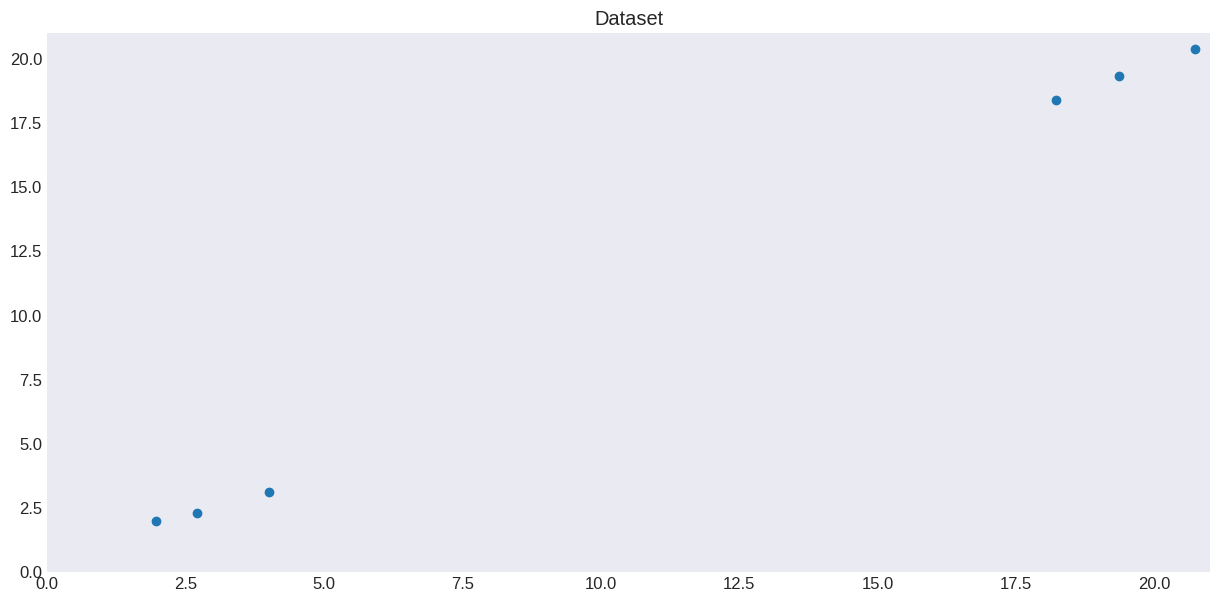

In [5]:
# Toy Dataset
x_axis = np.array([1,2,3,18,19,20])+ rnd.uniform(0, 1, size=6)
y_axis = np.array([1,2,3,18,19,20])+ rnd.uniform(0, 1, size=6)

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.grid()
plt.show()

#### **DENDOGRAM**

- A dendrogram is a diagram that shows the hierarchical relationship between objects. 
- **It is a summary of the distance matrix.** 
- Dendrograms cannot tell you how many clusters you should have

**A common mistake people make when reading dendrograms is to assume that the shape of the dendrogram gives a clue as to how many clusters exist.** 

- In the example above, the (incorrect) interpretation is that the dendrogram shows that there are two clusters, as the distance between the clusters (the vertical segments of the dendrogram) are highest between two and three clusters.
- Interpretation of this kind is justified only when the ultrametric tree inequality holds, which, as mentioned above, is very rare.
- In general, it is a mistake to use dendrograms as a tool for determining the number of clusters in data. Where there is an obviously “correct” number of clusters this will often be evident in a dendrogram. 

However, dendrograms often suggest a correct number of clusters when there is no real evidence to support the conclusion.

### Linkages

The method used to measure the distance between clusters of data points. 

Dendrograms are tree-like structures used in hierarchical clustering, a technique in data analysis and statistics where similar items are grouped together.

There are several linkage methods, each defining the distance between clusters differently. The choice of linkage method can significantly impact the structure of the resulting dendrogram and the clusters formed. Here are some common linkage methods:

* **Single Linkage (or Minimum Linkage):** This method measures the distance between the closest elements of two clusters. It tends to produce long, straggly clusters.

* **Complete Linkage (or Maximum Linkage):** This method measures the distance between the farthest elements of two clusters. It tends to produce compact, spherical clusters.

* **Average Linkage:** This method calculates the average distance between all pairs of elements in two clusters. It often strikes a balance between the extremes of single and complete linkage.

* **Centroid Linkage:** This method computes the distance between the centroids (mean points) of two clusters.

* **Ward's Linkage:** This method minimizes the variance within clusters. It tends to produce clusters of similar sizes and shapes.

The choice of linkage method depends on the characteristics of the data and the goals of the analysis. Different linkage methods may yield different results, and it's common to try several methods to see which one best captures the underlying structure of the data. Dendrograms are helpful visual tools for understanding the relationships between data points and the hierarchy of clusters.

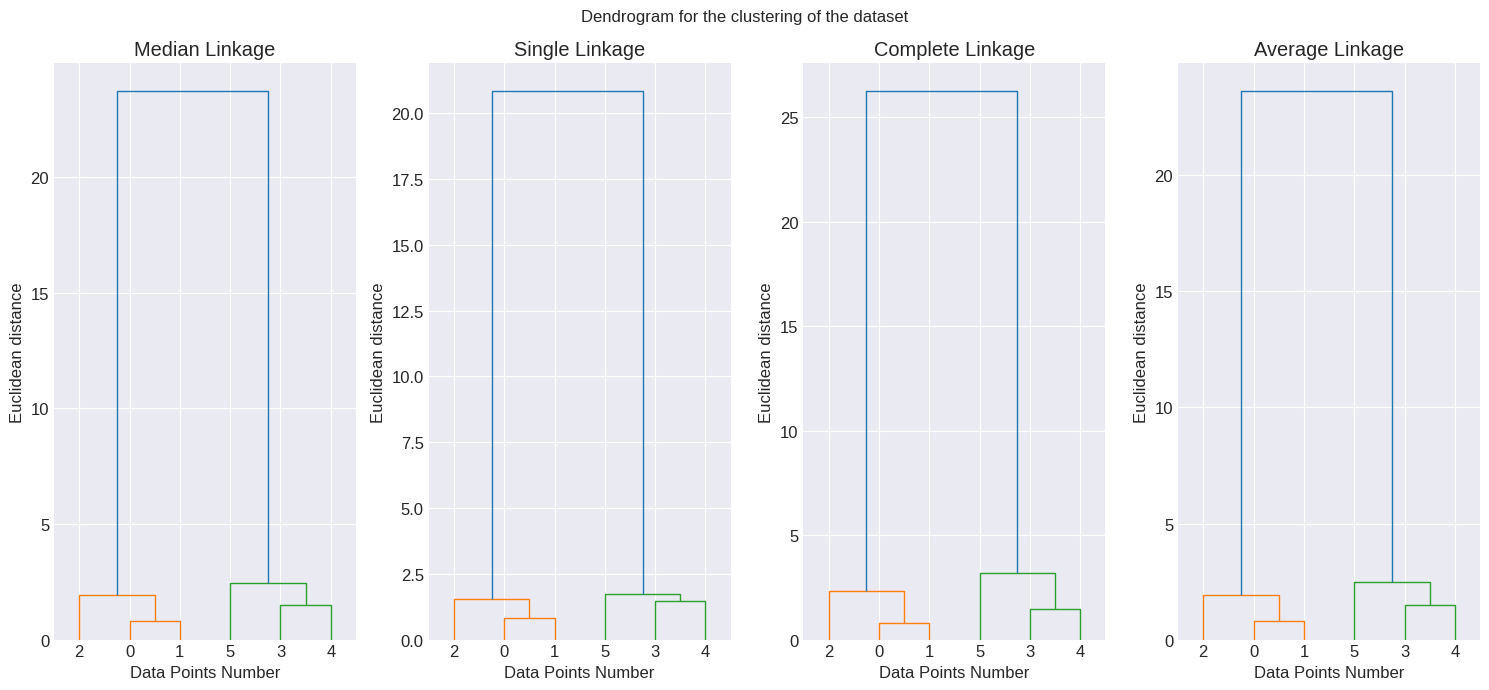

In [6]:
# Dendrogram (Median Linkage) 
fig, axes = plt.subplots(1, 4)

# Median linkage calculates the distance between two clusters as the distance
# between their centroids or the medians of their data points
Z_median = sch.linkage(data, method = 'median')

# Single linkage, the distance between two clusters is defined 
# as the shortest distance between any two data points from each cluster
Z_single = sch.linkage(data, method = 'single')

# Complete linkage, the distance between two clusters is defined as 
# the maximum distance between any two data points from each cluster.
Z_complete = sch.linkage(data, method = 'complete')

# Average linkage calculates the distance between two clusters as 
# the average of all pairwise distances between data points in the two clusters.
Z_average = sch.linkage(data, method = 'average')

ax = axes[0]
den = sch.dendrogram(Z_median, ax = ax)
ax.set_title('Median Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

ax = axes[1]
den = sch.dendrogram(Z_single, ax = ax)
ax.set_title('Single Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

ax = axes[2]
den = sch.dendrogram(Z_complete, ax = ax)
ax.set_title('Complete Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

ax = axes[3]
den = sch.dendrogram(Z_average, ax = ax)
ax.set_title('Average Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

fig.suptitle('Dendrogram for the clustering of the dataset')

plt.tight_layout()

plt.show();

## Agglomerative Clustering Model

In [7]:
# Building an Agglomerative Clustering Model : Initialise Model
# Looking at above dendrogram, it makes sense to divide in 
# 2 clusters for this dataset

cluster_H = AgglomerativeClustering(n_clusters=2,linkage= 'average')

# Model Fit
model_clt = cluster_H.fit(data)

print(model_clt)

print('\n')

data['clusters'] = model_clt.labels_

print('Clusters assigned to each datapoints, cluster = 2 :')

print(data['clusters'])

AgglomerativeClustering(linkage='average')


Clusters assigned to each datapoints, cluster = 2 :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int64


In [8]:
# Lets take another example : IRIS DATASET
# Loading the Dataset

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['labels']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
features_df = iris_df.drop('labels', axis = 1)

## Separate Classes?

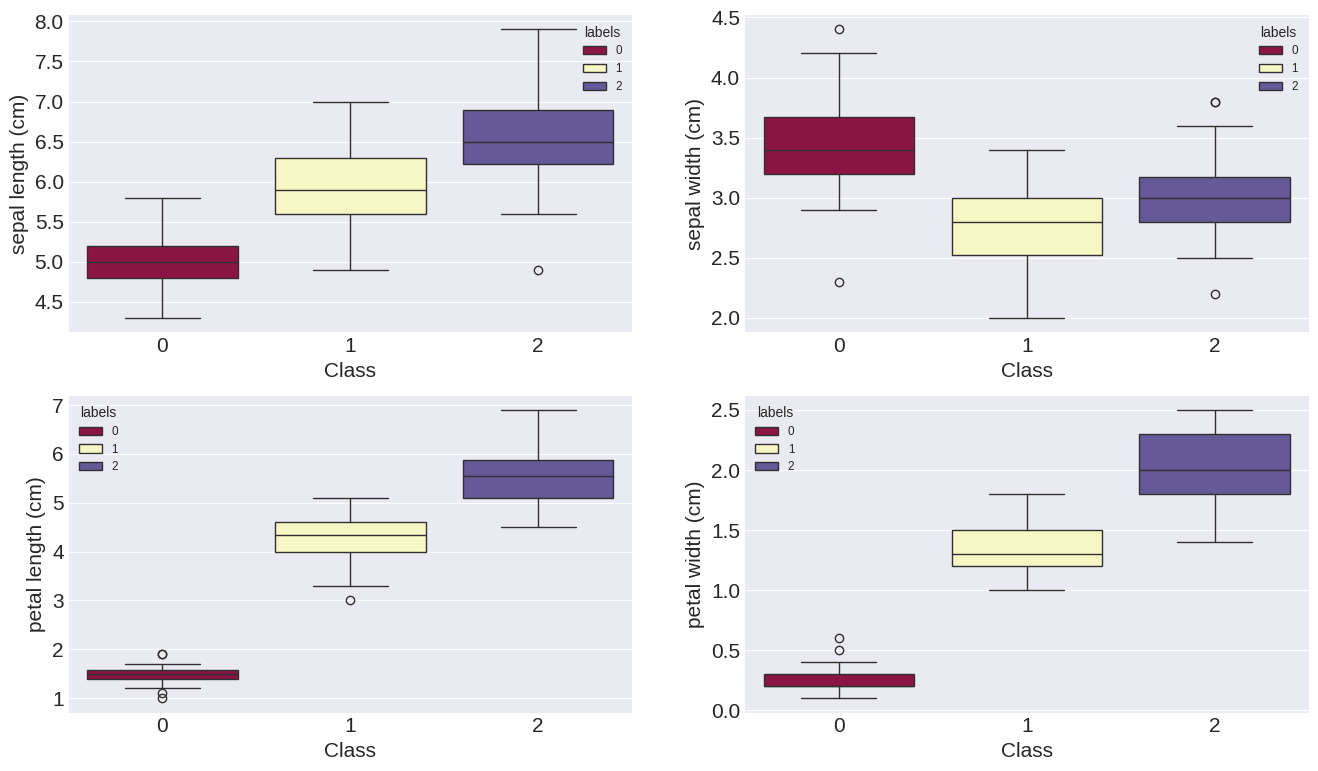

In [12]:
plt.figure(figsize=(16,14))

for i,c in enumerate(features_df.columns):
    
    plt.subplot(3,2,i+1)
    
    sns.boxplot(data=features_df, 
                x=iris_df.labels, y=features_df[c],
                hue = iris_df.labels, palette = 'Spectral')
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

## Plotting of Dendrogram

We make use of dendrogram to decide the number of clusters required for our dataset

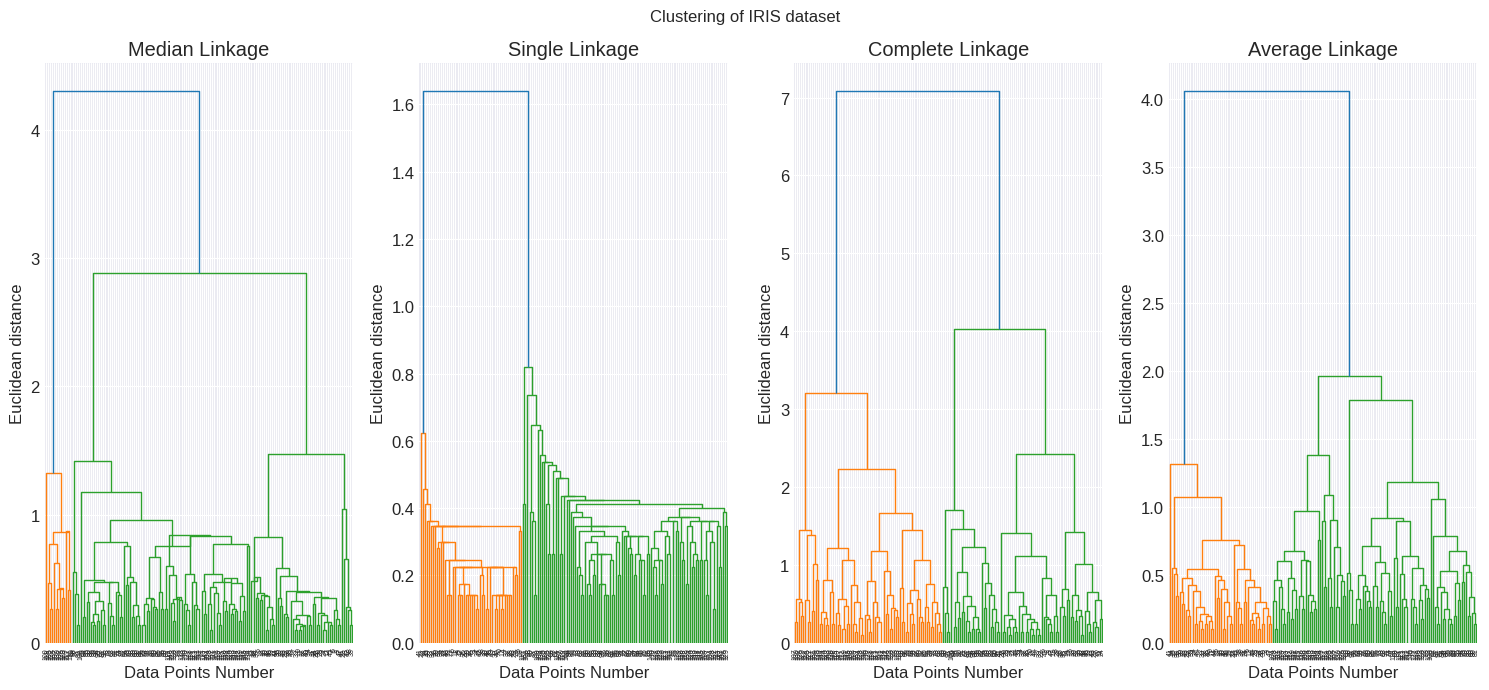

In [13]:
# Dendrogram (Median Linkage) 
fig, axes = plt.subplots(1, 4)

# Median linkage calculates the distance between two clusters as the distance
# between their centroids or the medians of their data points
Z_median = sch.linkage(features_df, method = 'median')

# Single linkage, the distance between two clusters is defined 
# as the shortest distance between any two data points from each cluster
Z_single = sch.linkage(features_df, method = 'single')

# Complete linkage, the distance between two clusters is defined as 
# the maximum distance between any two data points from each cluster.
Z_complete = sch.linkage(features_df, method = 'complete')

# Average linkage calculates the distance between two clusters as 
# the average of all pairwise distances between data points in the two clusters.
Z_average = sch.linkage(features_df, method = 'average')

ax = axes[0]
den = sch.dendrogram(Z_median, ax = ax)
ax.set_title('Median Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

ax = axes[1]
den = sch.dendrogram(Z_single, ax = ax)
ax.set_title('Single Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

ax = axes[2]
den = sch.dendrogram(Z_complete, ax = ax)
ax.set_title('Complete Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

ax = axes[3]
den = sch.dendrogram(Z_average, ax = ax)
ax.set_title('Average Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

fig.suptitle('Clustering of IRIS dataset')

plt.tight_layout()

plt.show();

In [14]:
sil_score_max = 0

for k in range(2,10):
    
    cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
    
    model_clt = cluster_H.fit(features_df)
    
    label = model_clt.labels_
    
    sil_coeff = silhouette_score(features_df, label, metric = 'euclidean')

    if sil_coeff > sil_score_max:
        sil_score_max = sil_coeff
        best_cluster = k
        
    print('For cluster= {}, Silhouette Coefficient is {:.5f}'.format(k,sil_coeff))

print('\n')
print(f'For Cluster: {best_cluster} Silhouette Value {sil_score_max:.4f} is highest')

For cluster= 2, Silhouette Coefficient is 0.68674
For cluster= 3, Silhouette Coefficient is 0.55416
For cluster= 4, Silhouette Coefficient is 0.47199
For cluster= 5, Silhouette Coefficient is 0.43067
For cluster= 6, Silhouette Coefficient is 0.34199
For cluster= 7, Silhouette Coefficient is 0.37074
For cluster= 8, Silhouette Coefficient is 0.36588
For cluster= 9, Silhouette Coefficient is 0.31668


For Cluster: 2 Silhouette Value 0.6867 is highest


In [15]:
D = 2 # so we can visualize it more easily
s = 6 # separation so we can control how far apart the means are
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 90 # number of samples
X = np.zeros((N, D))
X[:30, :] = np.random.randn(30, D) + mu1
X[30:60, :] = np.random.randn(30, D) + mu2
X[60:, :] = np.random.randn(30, D) + mu3


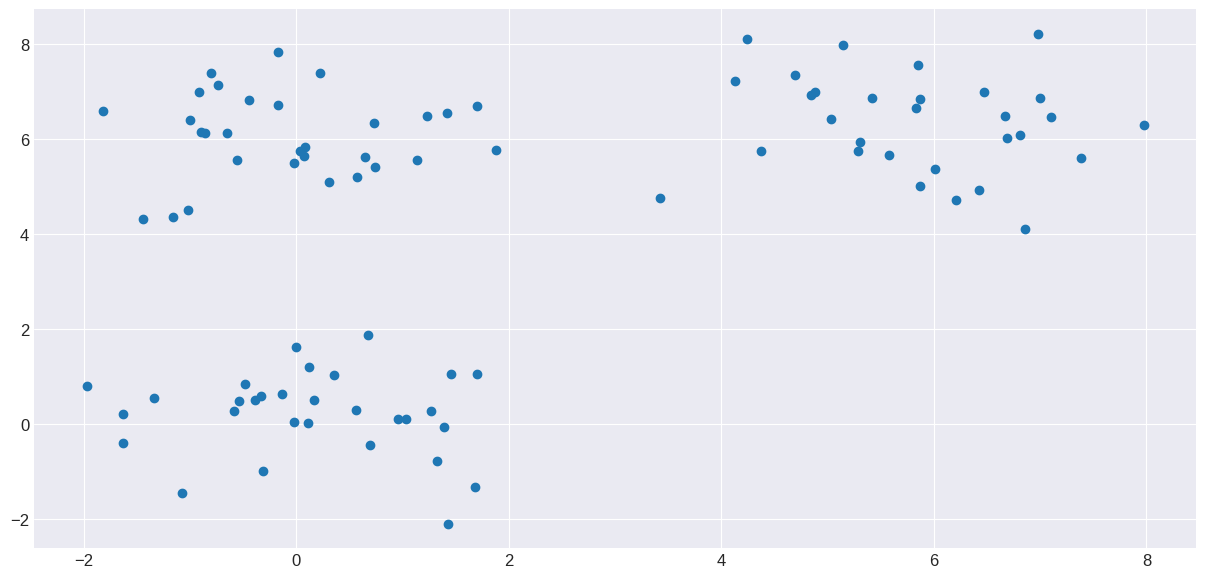

In [16]:
plt.scatter(X[:,0], X[:,1])

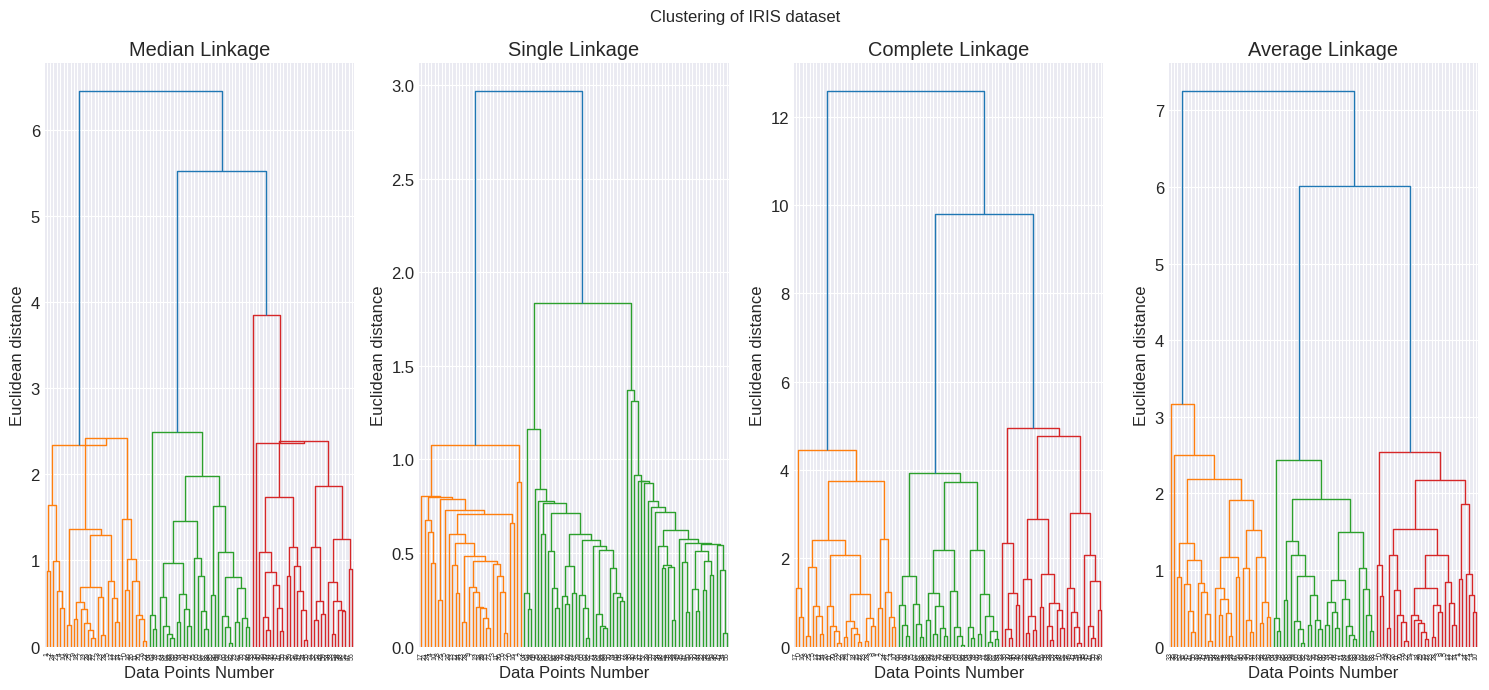

In [17]:
# Dendrogram
fig, axes = plt.subplots(1, 4 )

# Median linkage calculates the distance between two clusters as the distance
# between their centroids or the medians of their data points
Z_median = sch.linkage(X, method = 'median')

# Single linkage, the distance between two clusters is defined 
# as the shortest distance between any two data points from each cluster
Z_single = sch.linkage(X, method = 'single')

# Complete linkage, the distance between two clusters is defined as 
# the maximum distance between any two data points from each cluster.
Z_complete = sch.linkage(X, method = 'complete')

# Average linkage calculates the distance between two clusters as 
# the average of all pairwise distances between data points in the two clusters.
Z_average = sch.linkage(X, method = 'average')

ax = axes[0]
den = sch.dendrogram(Z_median, ax = ax)
ax.set_title('Median Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

ax = axes[1]
den = sch.dendrogram(Z_single, ax = ax)
ax.set_title('Single Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

ax = axes[2]
den = sch.dendrogram(Z_complete, ax = ax)
ax.set_title('Complete Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

ax = axes[3]
den = sch.dendrogram(Z_average, ax = ax)
ax.set_title('Average Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean distance')

fig.suptitle('Clustering of IRIS dataset')

plt.tight_layout()

plt.show();

In [18]:
sil_score_max = 0

for k in range(2,10):
    
    cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
    
    model_clt = cluster_H.fit(X)
    
    label = model_clt.labels_
    
    sil_coeff = silhouette_score(X, label, metric = 'euclidean')

    if sil_coeff > sil_score_max:
        sil_score_max = sil_coeff
        best_cluster = k
        
    print('For cluster= {}, Silhouette Coefficient is {:.5f}'.format(k,sil_coeff))

print('\n')
print(f'For Cluster: {best_cluster} Silhouette Value {sil_score_max:.4f} is highest!')

For cluster= 2, Silhouette Coefficient is 0.53616
For cluster= 3, Silhouette Coefficient is 0.69015
For cluster= 4, Silhouette Coefficient is 0.53350
For cluster= 5, Silhouette Coefficient is 0.43024
For cluster= 6, Silhouette Coefficient is 0.35652
For cluster= 7, Silhouette Coefficient is 0.30370
For cluster= 8, Silhouette Coefficient is 0.34376
For cluster= 9, Silhouette Coefficient is 0.34175


For Cluster: 3 Silhouette Value 0.6902 is highest!


## Proximity Matrix
A proximity matrix, also known as a distance matrix, is a symmetric matrix that represents the distances or similarities between pairs of data points in a dataset. It is a fundamental concept in various data analysis and clustering techniques

In [19]:
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# Compute the pairwise Euclidean distances
proximity_matrix = pairwise_distances(data, metric='euclidean')

# Print the proximity matrix
pd.DataFrame(proximity_matrix)

,0,1,2,3
0,0.000000,2.828427,5.656854,8.485281
1,2.828427,0.000000,2.828427,5.656854
2,5.656854,2.828427,0.000000,2.828427
3,8.485281,5.656854,2.828427,0.000000


## Clustering

Samples having some sort of similarity can be cluster together.

### K Means Clustering

The $K$-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the **cluster “centroids”**; note that they are not, in general, points from $X$, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$

<img src=../../images/ml/K-means_convergence.gif style="width: 500px;"/>

#### **Elbow Method**
- In the Elbow method, vary the number of clusters (K) in a range say, from 1 to 10. For each value of K, calculate WCSS (Within-Cluster Sum of Square)
- **WCSS is the sum of squared distance between each point and the centroid in a cluster**
- WCSS value is largest when K = 1. 

In [20]:
kmeans = KMeans(n_clusters = 3, n_init='auto', random_state = RANDOM_STATE ) # Note: we need to know expected clusters beforehand
kmeans.fit( X )
y_pred = kmeans.predict(X)
# Centers of our clusters
print("Centers :\n", np.round(kmeans.cluster_centers_, decimals=2))

print(f'Sum of Square Error/ WCSS is : {kmeans.inertia_:.2f}',)

Centers :
 [[-0.06  6.07]
 [ 0.15  0.23]
 [ 5.81  6.34]]
Sum of Square Error/ WCSS is : 169.43


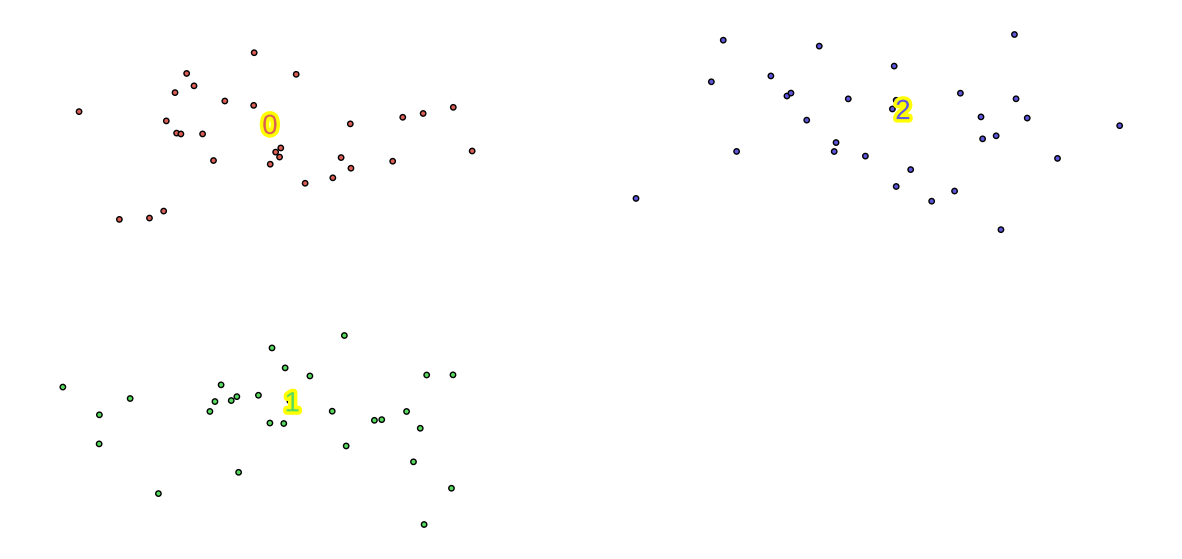

In [21]:
plot_scatter(X, y_pred)

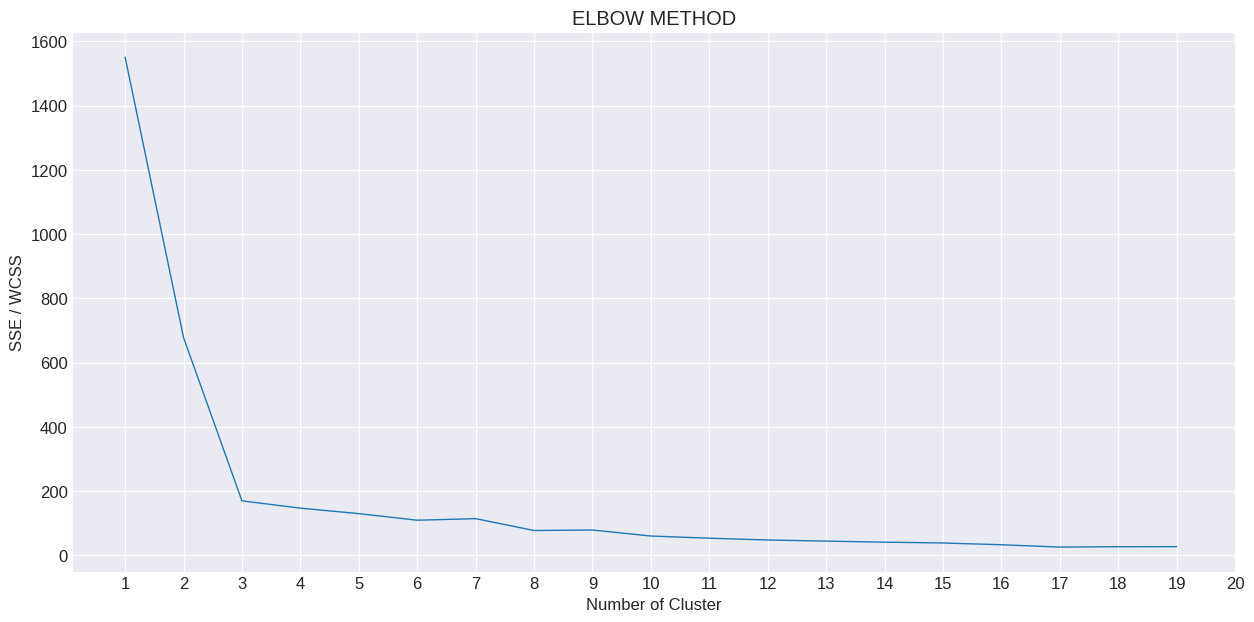

In [22]:
# ELBOW METHOD

# How many clusters should we choose ? - Elbow Method
# Select the elbow point for number of clusters

sse = {}

for k in range(1,20): # Maximum range taken as 20
    
    kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=100).fit(X)
    sse[k] = kmeans.inertia_
    #print("For cluster = {}, SSE/WCSS is {}".format(k, sse[k]))
    
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.xticks(np.arange(1, 21, 1.0))
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.show()

In [23]:
# lets pick another dataset
X, y = make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.79254123,  0.81852609],
        [-0.86341583,  0.77353281],
        [ 1.94098477,  0.40538635],
        [-0.96149236,  0.06064943],
        [-0.98373033,  0.05715389]]),
 array([0, 0, 1, 0, 0]))

In [24]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.792541,0.818526,0
1,-0.863416,0.773533,0
2,1.940985,0.405386,1
3,-0.961492,0.060649,0
4,-0.983730,0.057154,0


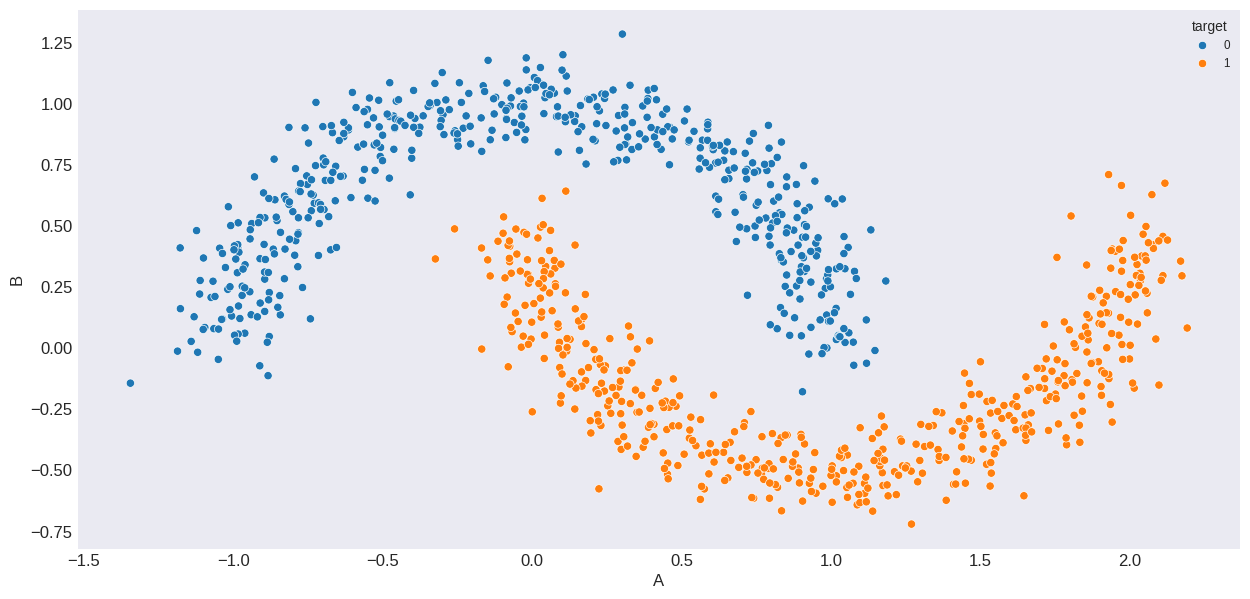

In [25]:
# Using Seaborn
ax = sns.scatterplot(x='A', y='B', data=data_df, hue='target')
ax.grid();

In [26]:
kmeans = KMeans(n_clusters = 2, n_init='auto', random_state = RANDOM_STATE ) # Note: we need to know expected clusters beforehand

kmeans.fit( X )

y_pred = kmeans.predict(X)

# Centers of our clusters
print("Centers :\n", np.round(kmeans.cluster_centers_, decimals=2))

print(f'Sum of Square Error/ WCSS is : {kmeans.inertia_:.2f}',)

Centers :
 [[ 1.18 -0.08]
 [-0.24  0.59]]
Sum of Square Error/ WCSS is : 417.37


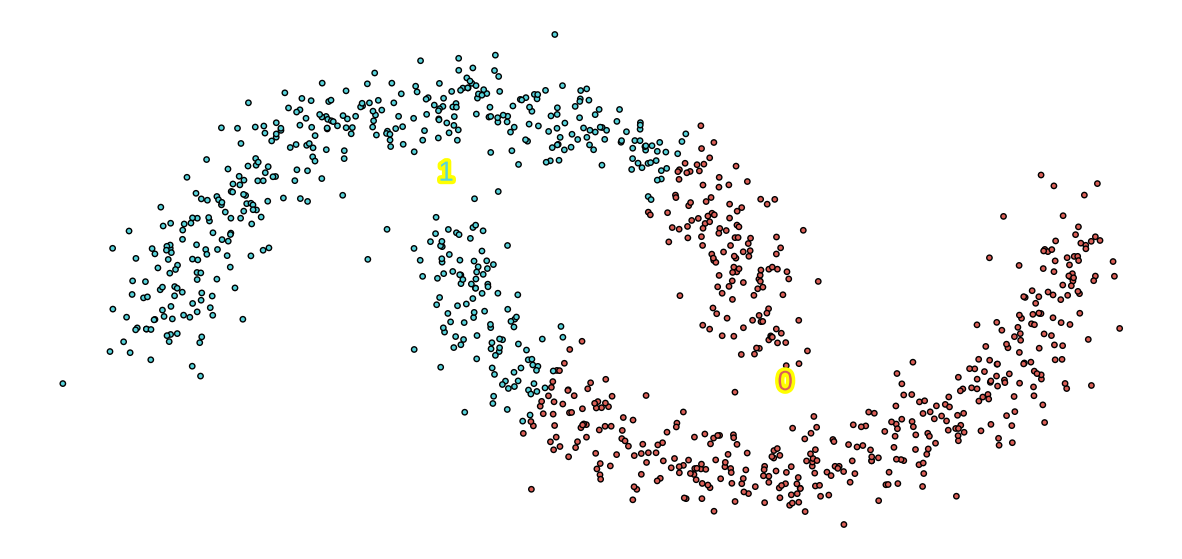

In [27]:
plot_scatter(X, y_pred)

In [28]:
# What if we say clusters are 3

kmeans = KMeans(n_clusters = 3, n_init='auto', max_iter = 100)
kmeans.fit( X )
y_pred = kmeans.predict(X)
# Centers of our clusters
print("Centers :\n", np.round(kmeans.cluster_centers_, decimals=2))

print(f'Sum of Square Error/ WCSS is : {kmeans.inertia_:.2f}',)

Centers :
 [[ 1.66 -0.14]
 [-0.38  0.66]
 [ 0.63  0.07]]
Sum of Square Error/ WCSS is : 284.25


# DBSCAN Clustering
The [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan) algorithm views clusters as areas of high density separated by areas of low density.

Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped.

The central component to the DBSCAN is the **concept of core samples, which are samples that are in areas of high density**. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).
<img src = '../../images/DBSCAN_1.png'>

In [29]:
clustering = DBSCAN(eps=0.10, min_samples=10).fit(X)
y_pred = clustering.labels_

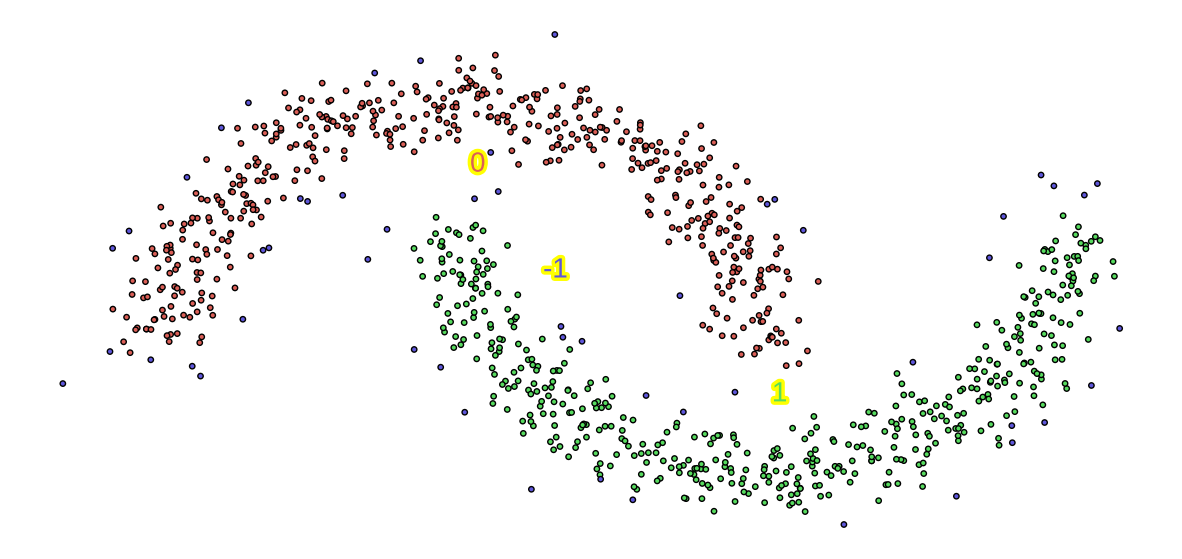

In [30]:
plot_scatter(X, y_pred)

## Exercise: Try Elbow method on iris data set and explain number of clusters achieved.